selecting attributes as the model can be overfitted if we have multiple hightly coreelated inputs but as the task requires, we are going to use all attributes as input variables, except the'RainTomorrow', which is used as the target variable.

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# read dataset
df = pd.read_csv('D3.csv')

In [54]:
# no missing value in this dataset

#correct datatype
df['Year']=df['Year'].astype(str) # 'Year' and 'Month' should be categorical value
df['Month']=df['Month'].astype(str)
df['Humidity9am']=df['Humidity9am'].astype(int)#Humidity9am, 3pm should be int as the value are integers
df['Humidity3pm']=df['Humidity3pm'].astype(int)
df['Cloud9am']=df['Cloud9am'].astype(str) # Cloud9am,3pm should be string (categorical value)
df['Cloud3pm']=df['Cloud9am'].astype(str)
#df['RainTomorrow']=df['RainTomorrow'].astype(str)
#handle noises in 'WindGustDir','WindDir9am' and 'WindDir3pm'
# NE should be NY, WNW should be NWN
df['WindGustDir']=df['WindGustDir'].replace({'NE':'NY', 'WNW':'NWN'})
df['WindDir9am']=df['WindDir9am'].replace({'NE':'NY', 'WNW':'NWN'})
df['WindDir3pm']=df['WindDir3pm'].replace({'NE':'NY', 'WNW':'NWN'})

df['RainTomorrow'].unique()


array([0, 1])

In [55]:
df['Month'].value_counts()

5     13054
3     13036
1     12921
6     12389
10    11804
7     11779
8     11762
11    11489
9     11344
4     11306
12    10810
2     10525
Name: Month, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           142219 non-null  object 
 1   Month          142219 non-null  object 
 2   Location       142219 non-null  object 
 3   MinTemp        142219 non-null  float64
 4   MaxTemp        142219 non-null  float64
 5   Rainfall       142219 non-null  float64
 6   Evaporation    142219 non-null  float64
 7   Sunshine       142219 non-null  float64
 8   WindGustDir    142219 non-null  object 
 9   WindGustSpeed  142219 non-null  int64  
 10  WindDir9am     142219 non-null  object 
 11  WindDir3pm     142219 non-null  object 
 12  WindSpeed9am   142219 non-null  int64  
 13  WindSpeed3pm   142219 non-null  int64  
 14  Humidity9am    142219 non-null  int64  
 15  Humidity3pm    142219 non-null  int64  
 16  Pressure9am    142219 non-null  float64
 17  Pressure3pm    142219 non-nul

In [57]:
#transforming Month to "Season"
df['Season']=df['Month'].replace({'1':'Summer','2':'Summer','3':'Autumn','4':'Autumn','5':'Autumn','6':'Winter'
                                  ,'7':'Winter','8':'Winter','9':'Spring','10':'Spring','11':'Spring','12':'Summer'})


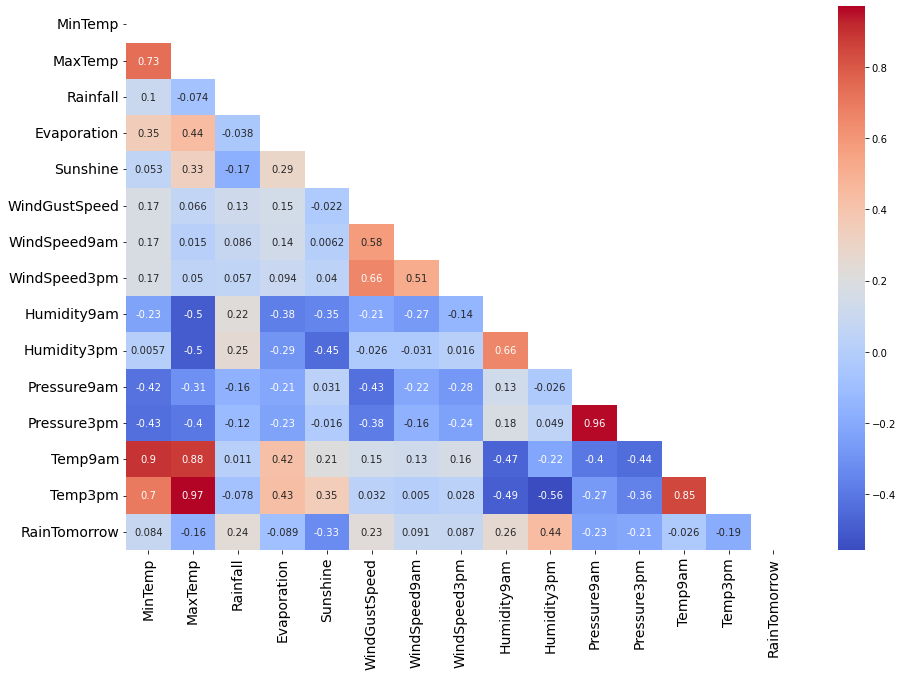

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True, cmap='coolwarm')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

remove highly correlated variables
Temp9am MinTemp Temp9am MaxTemp Temp3pm MinTemp Temp3pm MaxTemp Pressure3pm Pressure9am Temp3pm Temp9pm
As MinTemp and MaxTemp are extreme values, and they are highly correlated to Temp9am and Temp3pm, so we drop Minand 

In [59]:
#drop highly correlated attributes
df.drop(['MinTemp','MaxTemp','Month','WindGustDir','WindGustSpeed','Cloud9am','WindDir9am'
         ,'WindSpeed9am','Temp9am','Pressure9am','Humidity9am'],axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          142219 non-null  object 
 1   Location      142219 non-null  object 
 2   Rainfall      142219 non-null  float64
 3   Evaporation   142219 non-null  float64
 4   Sunshine      142219 non-null  float64
 5   WindDir3pm    142219 non-null  object 
 6   WindSpeed3pm  142219 non-null  int64  
 7   Humidity3pm   142219 non-null  int64  
 8   Pressure3pm   142219 non-null  float64
 9   Cloud3pm      142219 non-null  object 
 10  Temp3pm       142219 non-null  float64
 11  RainTomorrow  142219 non-null  int64  
 12  Season        142219 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 14.1+ MB


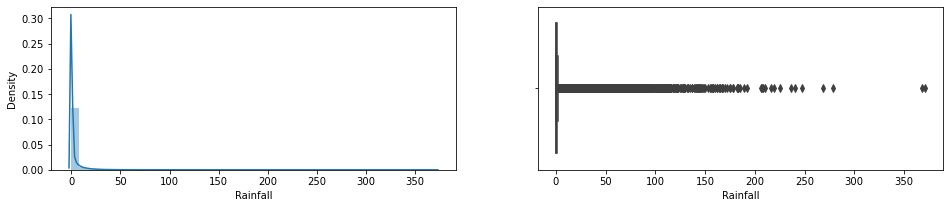

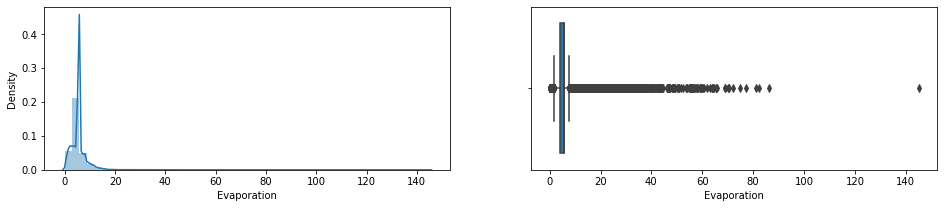

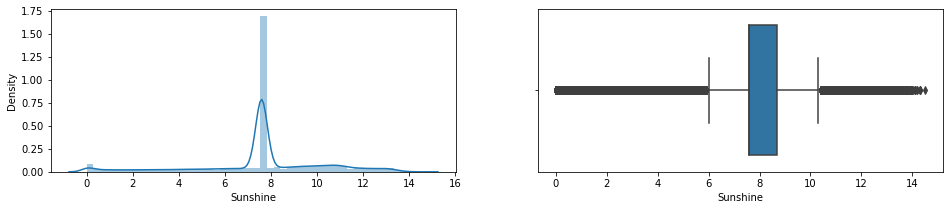

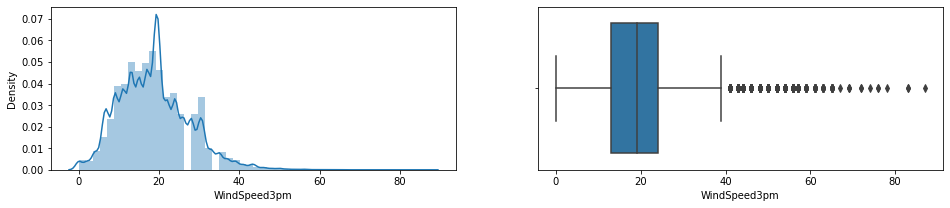

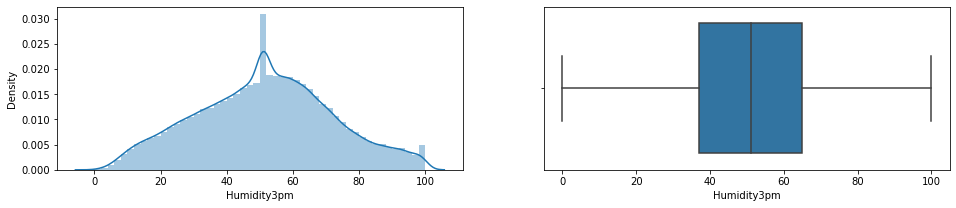

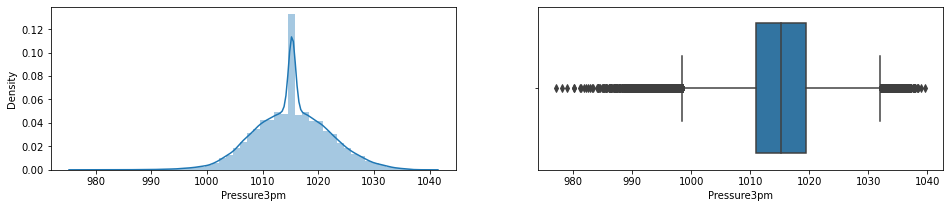

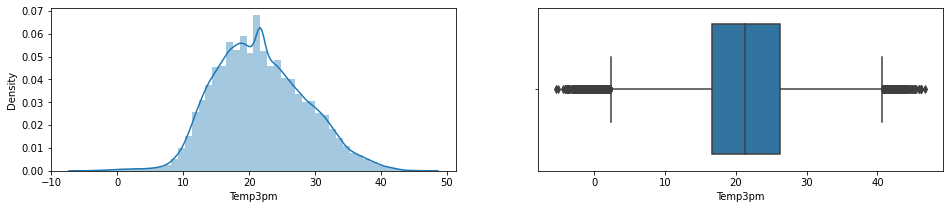

In [60]:
#check outliers
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
var=['Rainfall','Evaporation','Sunshine','WindSpeed3pm','Humidity3pm','Pressure3pm','Temp3pm']

for v in var:
    plt.figure(figsize=(16,3))
    plt.subplot(1,2,1)
    sns.distplot(df[v].dropna())
    plt.subplot(1,2,2)
    sns.boxplot(df[v].dropna())
    plt.show()

From the plots above, it is easy to identify that most figures contain outliers, especially 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am' and 'WindSpeed3pm'.
In addition, the variables are measured in difference scales, which would easily impact the regression models and make data comparability problematic. For example, the 'Rainfall' variable has values ranging from 0 to around 370. Min temperature, on the other hand, ranges from -8.5 to more than 30 degrees Celsius.
As a result, when the variables include large scale values as well as outliers, standardization can be applied for handling this situation. (not really sure if logistic regression is sensitive to outliers)

In [61]:
df=pd.get_dummies(df)
#using all variables to be the input as the task requests, but the 'RainTomorrow' is used as Target variable
# target/input split
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

# setting random state
rs = 30

X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3,
                                                    stratify=y, random_state=rs)



In [62]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 0.0, max 371.0, mean 2.35 and std dev 8.54
Variable #1: min 0.0, max 145.0, mean 5.48 and std dev 3.18
Variable #2: min 0.0, max 14.5, mean 7.62 and std dev 2.73
Variable #3: min 0.0, max 87.0, mean 18.65 and std dev 8.70
Variable #4: min 0.0, max 100.0, mean 51.50 and std dev 20.53
After scaling
-------------
Variable #0: min -0.2755498913892155, max 43.1717519569131, mean -0.00 and std dev 1.00
Variable #1: min -1.7240048191380806, max 43.931410328789205, mean 0.00 and std dev 1.00
Variable #2: min -2.7894073549281004, max 2.5211729579598265, mean 0.00 and std dev 1.00
Variable #3: min -2.1426106123252433, max 7.854657176064281, mean -0.00 and std dev 1.00
Variable #4: min -2.508712716223305, max 2.362791225321324, mean -0.00 and std dev 1.00


# Train Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
#initiate a model object (with random state to ensure consistent result) and fit it to the training dataset. 
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Train accuracy: 0.8402961236728175
Test accuracy: 0.8388881076266816
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33101
           1       0.71      0.47      0.57      9565

    accuracy                           0.84     42666
   macro avg       0.79      0.71      0.73     42666
weighted avg       0.83      0.84      0.83     42666



In [64]:
print(X_train.shape)

(99553, 96)


The training accuracy is very slightly higher than the test accuracy, not really indicating any overfitting. We will tune this logistic regression model later using GridSearchCV to imrprove the accuracy.

## 3. Understanding the logistic regression model <a name="viz"></a>
Once the model is trained, all of its weights are stored in `.coef_` array of the model.

In [14]:
print(model.coef_)

[[ 2.25539868e-01  3.79545636e-02 -4.28065644e-01  2.08592779e-01
   1.31801905e+00 -6.34691033e-01  1.54099096e-01  2.51212113e-02
  -8.49268249e-03 -2.68912006e-02 -5.02685261e-04  1.48543047e-03
   2.22316359e-02 -3.22501403e-02 -2.26385152e-02  4.22907237e-02
   7.06190415e-03  1.49338095e-02  1.13189156e-01 -1.39902439e-03
   5.07798788e-03  4.61164946e-02  2.58660769e-02 -3.25364527e-02
   2.96844456e-02  3.50668060e-02 -7.28208535e-02 -7.13718652e-03
   6.59265870e-02 -6.39562797e-03 -1.37570477e-03 -1.16876189e-01
  -6.79665864e-02 -5.26978125e-02 -5.25214850e-02 -7.58084168e-02
   2.09659592e-02 -3.70491796e-02 -9.06000571e-03  3.57034471e-02
   9.08031208e-03 -4.72096269e-02  4.09980720e-02 -4.38238675e-03
  -5.07003543e-02 -5.43976056e-02  1.29319257e-02  4.23063141e-02
   4.62276150e-02  6.49163894e-02  4.53937806e-02  4.89576259e-03
   3.98550980e-02 -5.29433025e-02  6.54781333e-02  2.55784394e-02
   8.48861877e-03 -1.65634383e-01  4.02173742e-02  2.45284217e-02
   2.47012

Each of these values corresponds to a variable/feature in the dataset. We can print out the feature name associated with each coefficient with this code below.

In [15]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

Rainfall : 0.225539868235735
Evaporation : 0.03795456357657753
Sunshine : -0.4280656438107119
WindSpeed3pm : 0.20859277869143159
Humidity3pm : 1.3180190523056878
Pressure3pm : -0.6346910328194451
Temp3pm : 0.1540990964953293
Year_2007 : 0.02512121125052567
Year_2008 : -0.008492682488106338
Year_2009 : -0.026891200625022066
Year_2010 : -0.0005026852605429211
Year_2011 : 0.0014854304668077815
Year_2012 : 0.02223163587317078
Year_2013 : -0.032250140277877364
Year_2014 : -0.02263851521280671
Year_2015 : 0.04229072367479775
Year_2016 : 0.007061904146019195
Year_2017 : 0.014933809514648448
Location_Adelaide : 0.11318915640837639
Location_Albany : -0.0013990243867371109


linear/logistic regression model assumes a linear correlation between input features and target values. This relationship is reflected in the weight values.

Positive coefficient means positive change in the input feature has positive correlation to the prediction value. 

Negative coefficient does the reverse. 

In [16]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

Humidity3pm : 1.3180190523056878
Pressure3pm : -0.6346910328194451
Sunshine : -0.4280656438107119
Rainfall : 0.225539868235735
WindSpeed3pm : 0.20859277869143159
Location_Townsville : -0.16563438290596522
Temp3pm : 0.1540990964953293
Cloud3pm_0 : -0.14822195346042943
Season_Summer : -0.1320497586008259
WindDir3pm_NNW : 0.11756141212135457
Location_Darwin : -0.11687618919443683
Location_Adelaide : 0.11318915640837639
WindDir3pm_NW : 0.10481930918199524
Location_Witchcliffe : 0.09976597119542623
WindDir3pm_N : 0.08051877628427544
Location_Wollongong : -0.07989083006736614
Season_Winter : 0.07965416140175315
Location_Launceston : -0.07580841678163806
Location_Cairns : -0.07282085347014425
WindDir3pm_SSE : -0.07151608545567545


Based on this output, the top-3 important variables in this model are Humidity3pm, Pressure3pm, and PPressure9am. The ordering of important variables may differ different between models.

In [71]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
                  return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=30), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [72]:
result_set = cv.cv_results_

Total number of models:  10


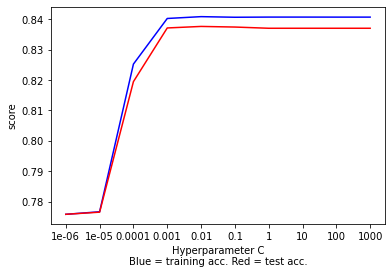

In [73]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [74]:
print(cv.best_params_)

{'C': 0.1}


Total number of models:  10


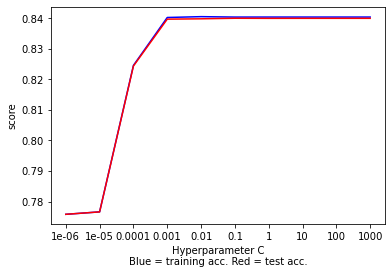

In [75]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [76]:
print(cv.best_params_)

{'C': 0.1}


In [77]:
coef = cv.best_estimator_.coef_[0] 
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

Humidity3pm : 1.3145862688994336
Pressure3pm : -0.6340863943506871
Sunshine : -0.4277559975079663
Rainfall : 0.22554059746133628
WindSpeed3pm : 0.20804452626699133
Location_Townsville : -0.16488414559943923
Temp3pm : 0.1512616703638075
Cloud3pm_0 : -0.14802424460349806
Season_Summer : -0.13124409672898968
WindDir3pm_NNW : 0.117451415518944
Location_Darwin : -0.11601438498251523
Location_Adelaide : 0.11283972696828698
WindDir3pm_NW : 0.10471325754371215
Location_Witchcliffe : 0.0996039208189609
WindDir3pm_N : 0.0805123449262921
Location_Wollongong : -0.07964477516046212
Season_Winter : 0.07896387125222447
Location_Launceston : -0.07581747793338325
Location_Cairns : -0.07214813753773183
WindDir3pm_SSE : -0.07147599708302155


In [79]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

cv.get_params()

Train accuracy: 0.840265988970699
Test accuracy: 0.8389115454928984


{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 30,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=30),
 'n_jobs': -1,
 'param_grid': {'C': [1e-06,
   1e-05,
   0.0001,
   0.001,
   0.01,
   0.1,
   1,
   10,
   100,
   1000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': None,
 'verbose': 0}

Using Recursive Feature elimination to build a regression model on reduced variables set

In [25]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 96
Number of features after elimination 74


In [26]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [27]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)


Train accuracy: 0.8406175604954145
Test accuracy: 0.8387943561618151
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33101
           1       0.71      0.47      0.57      9565

    accuracy                           0.84     42666
   macro avg       0.79      0.71      0.73     42666
weighted avg       0.83      0.84      0.83     42666

{'C': 0.01}


In [28]:
coef = rfe_cv.best_estimator_.coef_[0] 
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

Humidity3pm : 1.2862735608523586
Pressure3pm : -0.6256902979571459
Sunshine : -0.4239930773160763
Rainfall : 0.2245666050290765
WindSpeed3pm : 0.2050104661079153
Location_MountGinini : -0.15842943870293816
Location_Williamtown : -0.14445049928917925
WindDir3pm_NNW : -0.14078347992963278
Temp3pm : 0.1323640084092164
Year_2013 : 0.10973780509753901
Location_Archerfield : -0.10937815300949812
Location_SalmonGums : 0.10549901944859393
Location_PearceRAAF : 0.09862753193792828
Location_Sydney : 0.09251847432267299
Location_Uluru : -0.08154831837415244
Location_Walpole : -0.07657041614990902
Location_Penrith : -0.07651082389000267
Location_Brisbane : -0.07458288789187986
Location_Townsville : -0.068701061349225
Location_Sale : 0.06858040861524634


# 5.2. Feature selection using another model (Not going to apply anymore)

In [80]:
#import pickle
#with open('DT_claire.pickle', 'rb') as f:
#    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
#dt_best.fit(X_train, y_train)

#print(dt_best.best_params_)

In [81]:
#from dm_tools import analyse_feature_importance

# analyse feature importance from the tuned decision tree
#analyse_feature_importance(dt_best.best_estimator_, X.columns)

In [82]:
#Import `SelectFromModel` module from `sklearn.feature_selection`.
#from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
#selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
#X_train_sel_model = selectmodel.transform(X_train)
#X_test_sel_model = selectmodel.transform(X_test)

#print(X_train_sel_model.shape)

In [83]:
#params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

#cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
#cv_sel_model.fit(X_train_sel_model, y_train)

#print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
#print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
#y_pred = cv_sel_model.predict(X_test_sel_model)
#print(classification_report(y_test, y_pred))

# print parameters of the best model
#print(cv_sel_model.best_params_)

In [84]:
#coef = cv_sel_model.best_estimator_.coef_[0] 
#feature_names = X.columns

# sort them out in descending order
#indices = np.argsort(np.absolute(coef))
#indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
#indices = indices[:20]

#for i in indices:
#    print(feature_names[i], ':', coef[i])

In [85]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
#y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
#roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
#print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)

ROC index on test for `model`: 0.8503686707854005
ROC index on test for `cv`: 0.8503647290406606
ROC index on test for `rfe_cv`: 0.8503523810830806


In [86]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
#fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

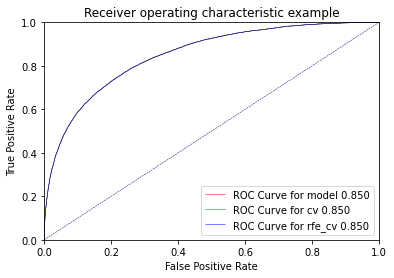

In [87]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for model {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for cv {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
#plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='yellow', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [88]:
import pickle
lr_best = cv
roc_index_lr_best = roc_index_lr_cv
tpr_lr_best = tpr_lr_cv
fpr_lr_best = fpr_lr_cv
with open('LR3.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)